In [1]:
import argparse
import os
import sys
import glob

import numpy as np
import torch
import torch.nn as nn
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt


2it [00:00, 17.57it/s]

(1024, 685)
(1024, 683)
(1024, 737)
(1280, 853)


4it [00:00, 15.27it/s]


<Figure size 432x288 with 0 Axes>

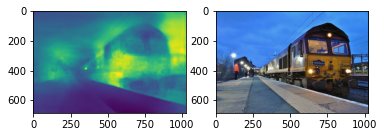

<Figure size 432x288 with 0 Axes>

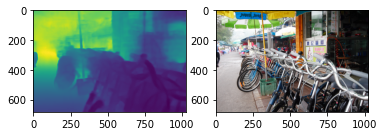

<Figure size 432x288 with 0 Axes>

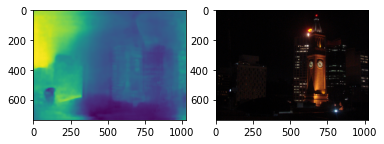

<Figure size 432x288 with 0 Axes>

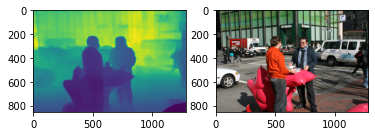

In [6]:
test_dir = "/data/xyao/adabins_depth/depth_results/train/"
src_dir = "/data/xyao/sg_dataset/sg_train_images/"
all_files = glob.glob(os.path.join(test_dir, "*"))
for index, f in tqdm(enumerate(all_files)):
    if index > 3:
        break
    fname = f.split('/')[-1]
    src_imname = os.path.join(src_dir, fname[:-4]+'.jpg')
    src_image = Image.open(src_imname)

    pil_image = Image.open(f)
    print(src_image.size)
    pil_image  = pil_image.resize(src_image.size)
    img = np.array(pil_image, np.int32, copy=False)

    

    plt.figure()

    #subplot(r,c) provide the no. of rows and columns
    f, axarr = plt.subplots(1,2) 

    # use the created array to output your multiple images. In this case I have stacked 4 images vertically
    axarr[0].imshow(img)
    axarr[1].imshow(src_image)

In [8]:
img.shape

(853, 1280)

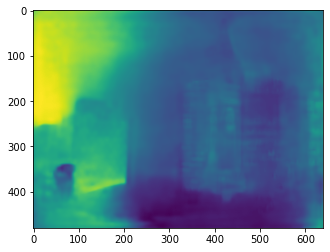

In [14]:
plt.imshow(img)

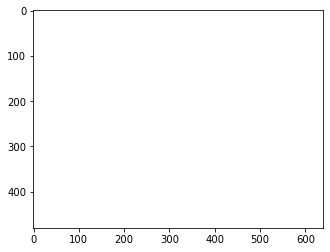

In [16]:
im2 = pil_image.convert('RGB')                  
im2 = np.array(im2) 
plt.imshow(im2)